## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'dataset/trainig_set'
valid_path = 'dataset/test_set'

In [ ]:
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in resnet152V2.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('dataset/trainig_set/*')

In [ ]:
# our layers - you can add more if you want/
x = Flatten()(resnet152V2.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('dataset/trainig_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

FileNotFoundError: ignored

In [ ]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 163 images belonging to 2 classes.


In [ ]:
test_set

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=10,
  validation_steps=5
)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
10/10 [==============================] - 219s 21s/step - loss: 2.3944 - accuracy: 0.7375 - val_loss: 1.4678 - val_accuracy: 0.8938
Epoch 2/10
10/10 [==============================] - 217s 22s/step - loss: 1.1018 - accuracy: 0.9072 - val_loss: 0.9072 - val_accuracy: 0.9125
Epoch 3/10
10/10 [==============================] - 203s 22s/step - loss: 1.3228 - accuracy: 0.9072 - val_loss: 1.4159 - val_accuracy: 0.9062
Epoch 4/10
10/10 [==============================] - 199s 20s/step - loss: 0.7327 - accuracy: 0.9156 - val_loss: 1.5032 - val_accuracy: 0.9062
Epoch 5/10
10/10 [==============================] - 215s 22s/step - loss: 0.4595 - accuracy: 0.9406 - val_loss: 1.9535 - val_accuracy: 0.9125
Epoch 6/10
10/10 [==============================] - 203s 21s/step - loss: 0.2271 - accuracy: 0.9625 - val_loss: 1.8298 - val_accuracy: 0.9125
Epoch 7/10
10/10 [==============================] - 182s 19s/step - loss: 0.7229 - accuracy: 0.9187 - val_loss: 1.4877 - val_accuracy: 0.9250
Epoch 

In [ ]:
import matplotlib.pyplot as plt

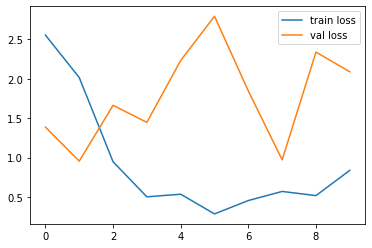

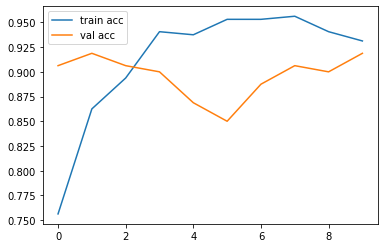

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model
model.save('m.h5')

D:\anaconda\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[4.5271399e-03, 9.9547285e-01],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.2443857e-37],
       [1.6281763e-16, 1.0000000e+00],
       [1.9033964e-35, 1.0000000e+00],
       [2.4234041e-31, 1.0000000e+00],
       [1.9231029e-08, 1.0000000e+00],
       [2.4856315e-29, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [3.7739316e-30, 1.0000000e+00],
       [4.8950388e-12, 1.0000000e+00],
       [1.0000000e+00, 1.1791210e-13],
       [6.9724254e-15, 1.0000000e+00],
       [1.0000000e+00, 5.3788538e-09],
       [1.0000000e+00, 4.5090865e-25],
       [6.1097333e-30, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [6.2882545e-16, 1.0000000e+00],
       [1.0000000e+00, 2.6369012e-15],
       [1.0000000e+00, 1.1149625e-17],
       [1.0000000e+00, 3.4454584e-22],
       [1.0000000e+00, 4.1121493e-27],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [8.3567615e-35, 1.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(test_set.classes, y_pred)

array([[49, 31],
       [42, 41]], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model1=load_model('m.h5')

In [ ]:
img=image.load_img('dataset/test_set/Arecanut Healthy/image401.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=x/255
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)


array([[1.0000000e+00, 5.0239265e-08]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([False])

In [ ]:
test_set

In [ ]:
y = model1.predict(test_set)

In [ ]:
y

array([[9.9663639e-01, 3.3636237e-03],
       [1.0000000e+00, 5.3788538e-09],
       [0.0000000e+00, 1.0000000e+00],
       [1.4162456e-33, 1.0000000e+00],
       [1.0000000e+00, 1.6342283e-34],
       [3.3667309e-25, 1.0000000e+00],
       [1.9033964e-35, 1.0000000e+00],
       [4.9590692e-32, 1.0000000e+00],
       [4.7809048e-35, 1.0000000e+00],
       [1.0000000e+00, 6.5955876e-25],
       [3.0035122e-20, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [9.9999571e-01, 4.3404243e-06],
       [1.0000000e+00, 2.0873388e-29],
       [1.0000000e+00, 4.8215573e-23],
       [1.0000000e+00, 1.7313499e-36],
       [1.0000000e+00, 0.0000000e+00],
       [9.9999797e-01, 2.0171001e-06],
       [1.9299255e-24, 1.0000000e+00],
       [1.0000000e+00, 4.9579668e-08],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.5838515e-12],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.1349328e-19],
       [6.9743729e-36, 1.0000000e+00],
       [1.9231029e-08, 1.